In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
solar = pd.read_csv("solar_generation_data.csv")

In [5]:
solar.head()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,Jan,1,109,85,30.0,9,0.0,9.93
1,Jan,2,106,71,30.1,9,0.0,9.97
2,Jan,3,106,81,29.5,9,0.0,9.77
3,Jan,4,102,83,13.0,4,0.0,4.30
4,Jan,5,105,80,30.1,9,0.0,9.97


In [6]:
solar.keys()

Index(['Month ', 'Day', 'Temp Hi', 'Temp Low', 'Solar',
       'Cloud Cover Percentage', 'Rainfall in mm', 'Power Generated in MW'],
      dtype='object')

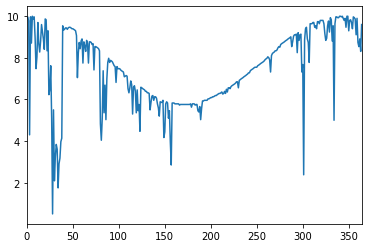

In [7]:
solar["Power Generated in MW"].plot()

In [8]:
solar.isnull().sum()

Month                      0
Day                        0
Temp Hi                    0
Temp Low                   0
Solar                      0
Cloud Cover Percentage     0
Rainfall in mm            53
Power Generated in MW      0
dtype: int64

In [9]:
solar.shape

(365, 8)

In [10]:
solar.loc[solar['Rainfall in mm'].isnull()]

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
312,Nov,9,95,75,29.3,9,NaN,9.70
313,Nov,10,95,66,28.6,9,NaN,9.47
314,Nov,11,100,66,28.8,9,NaN,9.54
315,Nov,12,103,71,28.4,9,NaN,9.40
316,Nov,13,103,71,29.4,9,NaN,9.74
317,Nov,14,98,73,29.4,9,NaN,9.74
318,Nov,15,100,66,29.1,9,NaN,9.64
319,Nov,16,102,68,29.6,9,NaN,9.80
320,Nov,17,104,75,29.6,9,NaN,9.80
321,Nov,18,104,73,29.6,9,NaN,9.80


In [11]:
solar['Rainfall in mm'].fillna((solar['Rainfall in mm'].mean()), inplace=True)


In [12]:
solar.isnull().sum()

Month                     0
Day                       0
Temp Hi                   0
Temp Low                  0
Solar                     0
Cloud Cover Percentage    0
Rainfall in mm            0
Power Generated in MW     0
dtype: int64

In [13]:
solar.describe()

,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.720548,91.687671,66.635616,22.615068,6.972603,2.737179,7.488192
std,8.808321,10.281531,10.750484,5.311600,1.699811,15.225814,1.759069
min,1.000000,66.000000,43.000000,1.500000,1.000000,0.000000,0.500000
25%,8.000000,83.000000,58.000000,18.500000,6.000000,0.000000,6.130000
50%,16.000000,93.000000,68.000000,22.800000,7.000000,0.000000,7.550000
75%,23.000000,99.000000,75.000000,27.000000,9.000000,0.000000,8.940000
max,31.000000,111.000000,94.000000,30.200000,9.000000,161.500000,10.000000


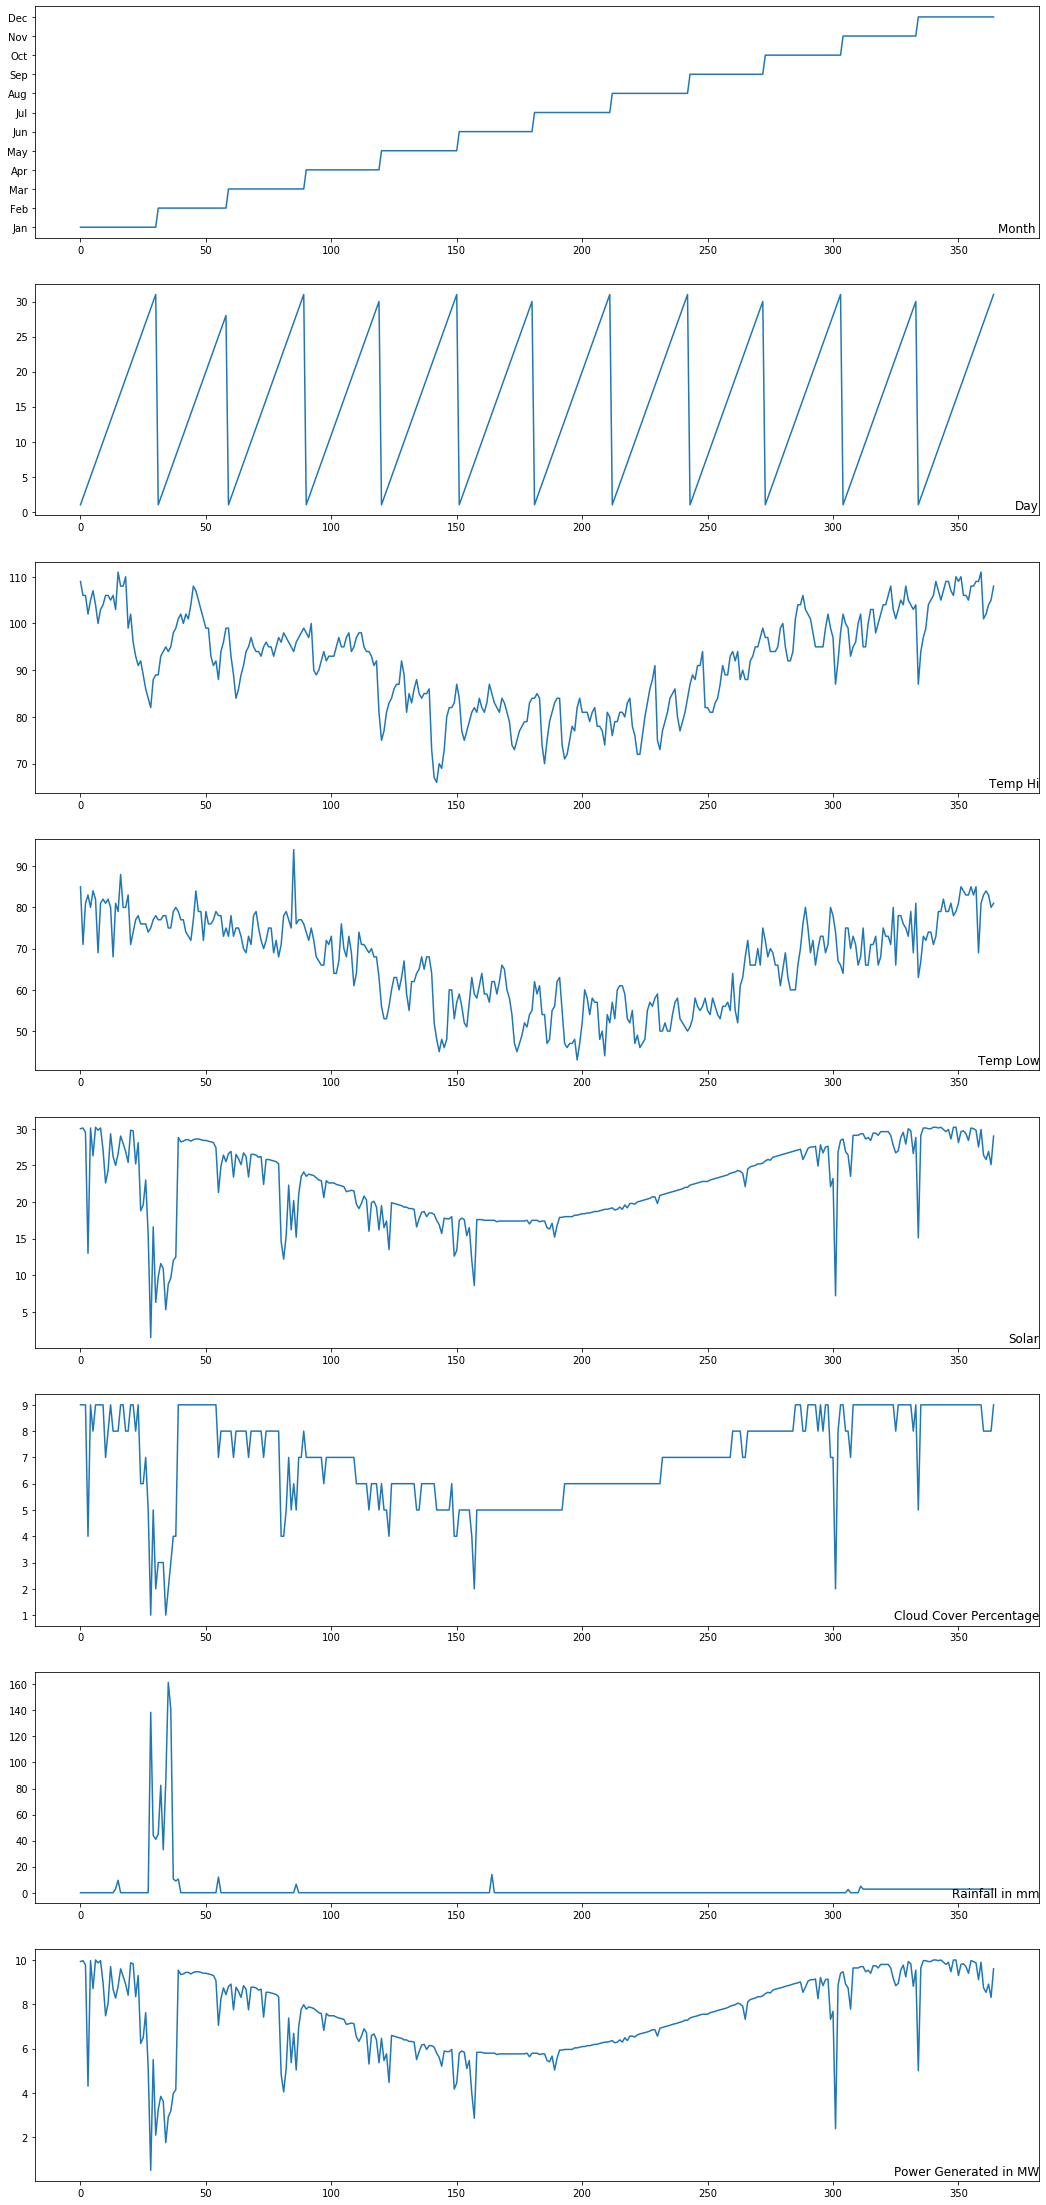

In [14]:
fig, ax = plt.subplots(figsize=(18,40))
for i in range(len(solar.columns)):
    plt.subplot(len(solar.columns), 1, i+1)
    name = solar.columns[i]
    plt.plot(solar[name])
    plt.title(name, y=0, loc = 'right')
plt.show()


In [15]:
column_indices = {name: i for i, name in enumerate(solar.columns)}

In [16]:
column_indices

{'Month ': 0,
 'Day': 1,
 'Temp Hi': 2,
 'Temp Low': 3,
 'Solar': 4,
 'Cloud Cover Percentage': 5,
 'Rainfall in mm': 6,
 'Power Generated in MW': 7}

In [17]:

solar['month_int'] = solar["Month "].replace({'Jan': '1', 'Feb': '2', 'Mar':'3','Apr':'4','May':'5','Jun':'6', 'Jul':'7','Aug':'8', 'Sep': '9', 'Oct':'10', 
        'Nov':'11', 'Dec':'12'})

In [18]:
solar.tail()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,month_int
360,Dec,27,101,83,26.4,8,2.737179,8.74,12
361,Dec,28,102,84,25.8,8,2.737179,8.54,12
362,Dec,29,104,83,26.9,8,2.737179,8.91,12
363,Dec,30,105,80,25.1,8,2.737179,8.31,12
364,Dec,31,108,81,29.0,9,2.737179,9.60,12


In [19]:
#solar['month_day'] = solar['month_int'].str.cat(solar['Day'])
#solar['month_day'] = solar['month_int'].astype(str) + solar.pop('Day').astype(str)
#solar['month_day'] = solar['month_day'].astype(int)


In [20]:
solar.tail()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,month_int
360,Dec,27,101,83,26.4,8,2.737179,8.74,12
361,Dec,28,102,84,25.8,8,2.737179,8.54,12
362,Dec,29,104,83,26.9,8,2.737179,8.91,12
363,Dec,30,105,80,25.1,8,2.737179,8.31,12
364,Dec,31,108,81,29.0,9,2.737179,9.60,12


In [21]:
solar.dtypes

Month                      object
Day                         int64
Temp Hi                     int64
Temp Low                    int64
Solar                     float64
Cloud Cover Percentage      int64
Rainfall in mm            float64
Power Generated in MW     float64
month_int                  object
dtype: object

In [22]:
def remove_degree(value):
    if len(value) == 4:
        value = value[:3]
    else:
        value = value[:2]
    return value

In [23]:
#solar['Temp Hi']=solar['Temp Hi'].apply(remove_degree)


In [24]:
#solar['Temp Low']=solar['Temp Low'].apply(remove_degree)


In [25]:
solar.head(100)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,month_int
0,Jan,1,109,85,30.0,9,0.0,9.93,1
1,Jan,2,106,71,30.1,9,0.0,9.97,1
2,Jan,3,106,81,29.5,9,0.0,9.77,1
3,Jan,4,102,83,13.0,4,0.0,4.30,1
4,Jan,5,105,80,30.1,9,0.0,9.97,1
...,...,...,...,...,...,...,...,...,...
95,Apr,6,90,67,23.0,7,0.0,7.62,4
96,Apr,7,92,66,22.9,7,0.0,7.58,4
97,Apr,8,94,66,20.6,6,0.0,6.82,4
98,Apr,9,92,72,22.9,7,0.0,7.58,4


In [26]:
solar['Temp Hi'] = pd.to_numeric(solar['Temp Hi'])
solar['Temp Low'] = pd.to_numeric(solar['Temp Low'])

In [27]:
solar.dtypes

Month                      object
Day                         int64
Temp Hi                     int64
Temp Low                    int64
Solar                     float64
Cloud Cover Percentage      int64
Rainfall in mm            float64
Power Generated in MW     float64
month_int                  object
dtype: object

In [28]:
solar = solar.drop(['Month '], axis = 1)

In [29]:
#solar = solar.drop(['month_int'], axis = 1)

In [30]:
solar.head()

,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW,month_int
0,1,109,85,30.0,9,0.0,9.93,1
1,2,106,71,30.1,9,0.0,9.97,1
2,3,106,81,29.5,9,0.0,9.77,1
3,4,102,83,13.0,4,0.0,4.30,1
4,5,105,80,30.1,9,0.0,9.97,1


In [31]:
solar.columns

Index(['Day', 'Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage',
       'Rainfall in mm', 'Power Generated in MW', 'month_int'],
      dtype='object')

In [32]:
solar = solar[['Day','month_int','Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage',
       'Rainfall in mm', 'Power Generated in MW']]
# solar = solar[['Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage',
#        'Rainfall in mm', 'Power Generated in MW']]

In [33]:
solar.head()

,Day,month_int,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,1,1,109,85,30.0,9,0.0,9.93
1,2,1,106,71,30.1,9,0.0,9.97
2,3,1,106,81,29.5,9,0.0,9.77
3,4,1,102,83,13.0,4,0.0,4.30
4,5,1,105,80,30.1,9,0.0,9.97


In [34]:
n = len(solar)
train_df = solar[0:int(n*0.8)]
test_df = solar[int(n*0.8):]

num_features = solar.shape[1]

In [35]:
train_df

,Day,month_int,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,1,1,109,85,30.0,9,0.0,9.93
1,2,1,106,71,30.1,9,0.0,9.97
2,3,1,106,81,29.5,9,0.0,9.77
3,4,1,102,83,13.0,4,0.0,4.30
4,5,1,105,80,30.1,9,0.0,9.97
...,...,...,...,...,...,...,...,...
287,15,10,104,70,27.2,9,0.0,9.01
288,16,10,106,76,25.8,8,0.0,8.54
289,17,10,103,80,26.5,8,0.0,8.77
290,18,10,102,75,27.3,9,0.0,9.04


In [36]:

#solar.index = solar['month_day']
solar.head()
#solar.drop(['month_day'], axis=1, inplace=True)

,Day,month_int,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,1,1,109,85,30.0,9,0.0,9.93
1,2,1,106,71,30.1,9,0.0,9.97
2,3,1,106,81,29.5,9,0.0,9.77
3,4,1,102,83,13.0,4,0.0,4.30
4,5,1,105,80,30.1,9,0.0,9.97


In [37]:
solar.count()

Day                       365
month_int                 365
Temp Hi                   365
Temp Low                  365
Solar                     365
Cloud Cover Percentage    365
Rainfall in mm            365
Power Generated in MW     365
dtype: int64

In [38]:
#solar.index = pd.date_range(start='1/1/2019', end='31/12/2019')

In [39]:
solar.head()

,Day,month_int,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,1,1,109,85,30.0,9,0.0,9.93
1,2,1,106,71,30.1,9,0.0,9.97
2,3,1,106,81,29.5,9,0.0,9.77
3,4,1,102,83,13.0,4,0.0,4.30
4,5,1,105,80,30.1,9,0.0,9.97


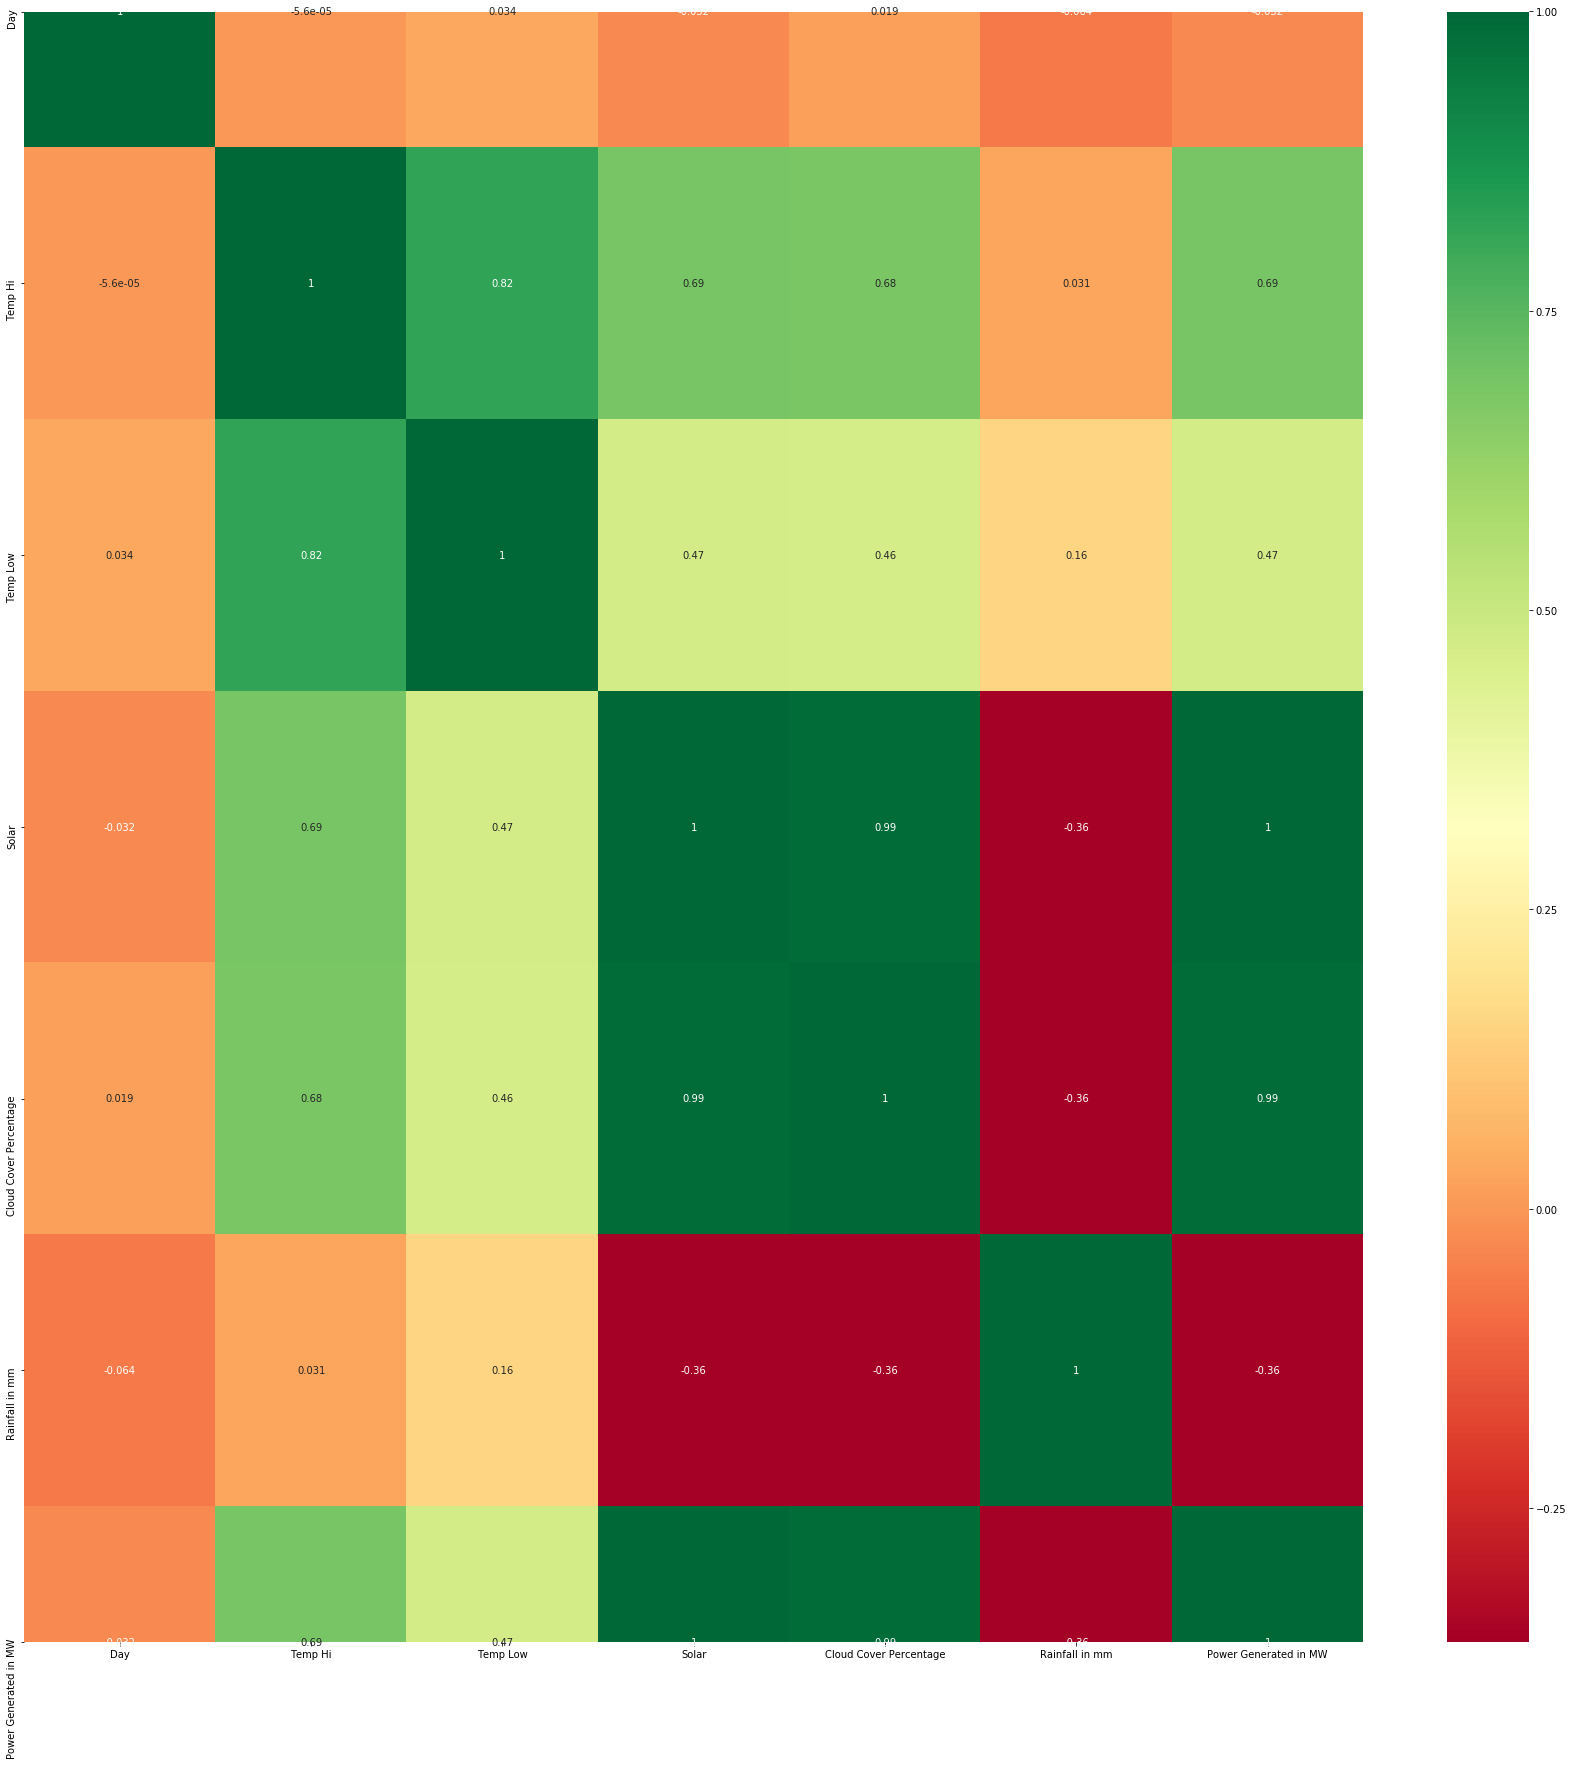

In [40]:
corr = solar.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(solar[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
y_training = train_df.pop("Power Generated in MW")

In [42]:
y_training.head()

0    9.93
1    9.97
2    9.77
3    4.30
4    9.97
Name: Power Generated in MW, dtype: float64

In [43]:
X_training = train_df
X_training.head()

,Day,month_int,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm
0,1,1,109,85,30.0,9,0.0
1,2,1,106,71,30.1,9,0.0
2,3,1,106,81,29.5,9,0.0
3,4,1,102,83,13.0,4,0.0
4,5,1,105,80,30.1,9,0.0


In [44]:
y_test = test_df.pop("Power Generated in MW")

In [45]:
X_test = test_df

In [46]:
column_trans = make_column_transformer(
    (StandardScaler(),['Temp Hi','Temp Low','Solar','Cloud Cover Percentage','Rainfall in mm']),
    remainder = 'passthrough')

In [47]:
linreg = LinearRegression()


In [48]:
pca = PCA()
pipeline_linreg = Pipeline(steps=[('transform',column_trans),('pca', pca), ('linear', linreg)])

In [49]:
pipeline_linreg.fit(X_training, y_training)

Pipeline(memory=None,
         steps=[('transform',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Temp Hi', 'Temp Low',
                                                   'Solar',
                                                   'Cloud Cover Percentage',
                                                   'Rainfall in mm'])],
                                   verbose=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                  

In [50]:
y_train_pred = pipeline_linreg.predict(X_training)



In [51]:
#y_random = pipeline_linreg.predict(data)

In [52]:
mean_absolute_error(y_training, y_train_pred)

0.0025402003043439305

In [53]:
y_test_pred = pipeline_linreg.predict(X_test)

In [54]:
mean_absolute_error(y_test, y_test_pred)

0.0024265361085798365

In [55]:
#filename = 'finalized_model.sav'

In [62]:
#import pickle
#pickle.dump(pipeline_linreg, open(filename, 'wb'))
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

0.9999927338986365


In [63]:
 #this is the saved model
import pickle
with open('solar.pkl','wb') as f:
    pickle.dump(pipeline_linreg, f)

In [64]:
rf_pickle = pickle.load(open('solar.pkl','rb'))
y_test_pred = rf_pickle.predict(X_test)
print(y_test_pred)

[9.10596531 9.13912937 8.24460938 9.20509551 8.83967383 9.1058647
 9.13883789 7.31677805 7.68051638 2.38189054 8.8727017  9.4033418
 9.47018842 8.90622924 8.7409114  7.78044621 9.63534073 9.63533353
 9.63533979 9.70143304 9.70135438 9.47001385 9.53606077 9.40366352
 9.73428383 9.73428083 9.63514608 9.80038936 9.80023109 9.80023496
 9.80018558 9.63484353 9.17182505 8.83970807 8.9403484  9.53546462
 9.76693285 9.23784079 9.93223775 9.83293397 8.80638382 9.53526558
 4.9998368  9.63546414 9.9659579  9.96592408 9.93274562 9.93270731
 9.99884518 9.99875362 9.96559042 9.99865008 9.89935976 9.80016278
 9.89932981 9.46945177 9.99851836 9.99843128 9.30402413 9.79989493
 9.83299228 9.70072158 9.4031226  9.96513189 9.93207101 9.86587207
 9.10560435 9.89892243 8.74002621 8.54158381 8.9052623  8.31010505
 9.60123664]


In [65]:
#rf_pickle = pickle.load(open('solar.pkl','rb'))
y_test_pred = rf_pickle.score(X_test, y_test)
print(y_test_pred)

0.9999927338986365


In [71]:
#df=pd.read_pickle("./solar.pkl")
#print(df)

Pipeline(memory=None,
         steps=[('transform',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Temp Hi', 'Temp Low',
                                                   'Solar',
                                                   'Cloud Cover Percentage',
                                                   'Rainfall in mm'])],
                                   verbose=False)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                  

In [59]:
print(y_test)
mean_absolute_error(y_test, y_test_pred)

292    9.11
293    9.14
294    8.25
295    9.21
296    8.84
       ... 
360    8.74
361    8.54
362    8.91
363    8.31
364    9.60
Name: Power Generated in MW, Length: 73, dtype: float64


0.0024265361085798365

In [ ]:
cols = ['Day','Month','Temp Hi', 'Temp Low', 'Solar', 'Cloud Cover Percentage', 'Rainfall in mm']
data = pd.DataFrame([[2,1,120,71,37.1,9,1.0]], columns=cols)

In [ ]:
# I tried with and without the "date" and "month" column to see if i was overfitting, results were very similar so i left it 